In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx


df = pd.read_csv("PSL_Season_09_dataset.csv")


In [69]:
df.head(10)


,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,1416472,2023/24,2024-02-17,"Gaddafi Stadium, Lahore",1,1.5,Lahore Qalandars,Islamabad United,Sahibzada Farhan,Fakhar Zaman,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1416472,2023/24,2024-02-17,"Gaddafi Stadium, Lahore",1,1.6,Lahore Qalandars,Islamabad United,Sahibzada Farhan,Fakhar Zaman,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1416472,2023/24,2024-02-17,"Gaddafi Stadium, Lahore",1,2.1,Lahore Qalandars,Islamabad United,Fakhar Zaman,Sahibzada Farhan,...,5,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1416472,2023/24,2024-02-17,"Gaddafi Stadium, Lahore",1,2.2,Lahore Qalandars,Islamabad United,Fakhar Zaman,Sahibzada Farhan,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1416472,2023/24,2024-02-17,"Gaddafi Stadium, Lahore",1,2.3,Lahore Qalandars,Islamabad United,Sahibzada Farhan,Fakhar Zaman,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1416472,2023/24,2024-02-17,"Gaddafi Stadium, Lahore",1,2.4,Lahore Qalandars,Islamabad United,Sahibzada Farhan,Fakhar Zaman,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1416472,2023/24,2024-02-17,"Gaddafi Stadium, Lahore",1,2.5,Lahore Qalandars,Islamabad United,Sahibzada Farhan,Fakhar Zaman,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1416472,2023/24,2024-02-17,"Gaddafi Stadium, Lahore",1,2.6,Lahore Qalandars,Islamabad United,Fakhar Zaman,Sahibzada Farhan,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1416472,2023/24,2024-02-17,"Gaddafi Stadium, Lahore",1,2.7,Lahore Qalandars,Islamabad United,Fakhar Zaman,Sahibzada Farhan,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1416472,2023/24,2024-02-17,"Gaddafi Stadium, Lahore",1,3.1,Lahore Qalandars,Islamabad United,Fakhar Zaman,Sahibzada Farhan,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
df.shape
df.columns
df.info


<bound method DataFrame.info of       match_id   season  start_date                      venue  innings  ball  \
0      1416472  2023/24  2024-02-17    Gaddafi Stadium, Lahore        1   1.5   
1      1416472  2023/24  2024-02-17    Gaddafi Stadium, Lahore        1   1.6   
2      1416472  2023/24  2024-02-17    Gaddafi Stadium, Lahore        1   2.1   
3      1416472  2023/24  2024-02-17    Gaddafi Stadium, Lahore        1   2.2   
4      1416472  2023/24  2024-02-17    Gaddafi Stadium, Lahore        1   2.3   
...        ...      ...         ...                        ...      ...   ...   
7790   1416505  2023/24  2024-03-18  National Stadium, Karachi        2  19.2   
7791   1416505  2023/24  2024-03-18  National Stadium, Karachi        2  19.3   
7792   1416505  2023/24  2024-03-18  National Stadium, Karachi        2  19.4   
7793   1416505  2023/24  2024-03-18  National Stadium, Karachi        2  19.5   
7794   1416505  2023/24  2024-03-18  National Stadium, Karachi        2  19.6

In [71]:
df.isnull().sum()

match_id                     0
season                       0
start_date                   0
venue                        0
innings                      0
ball                         0
batting_team                 0
bowling_team                 0
striker                      0
non_striker                  0
bowler                       0
runs_off_bat                 0
extras                       0
wides                     7507
noballs                   7772
byes                      7779
legbyes                   7659
penalty                   7794
wicket_type               7392
player_dismissed          7392
other_wicket_type         7795
other_player_dismissed    7795
dtype: int64

In [72]:
numeric_extras = ['wides', 'noballs', 'byes', 'legbyes', 'penalty',  ]
df[numeric_extras] = df[numeric_extras].fillna(0)

In [73]:
df[numeric_extras] = df[numeric_extras].astype(int)
df['runs_off_bat'] = df['runs_off_bat'].astype(int)
df['extras'] = df['extras'].astype(int)

In [74]:
df.head(10)


,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,1416472,2023/24,2024-02-17,"Gaddafi Stadium, Lahore",1,1.5,Lahore Qalandars,Islamabad United,Sahibzada Farhan,Fakhar Zaman,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
1,1416472,2023/24,2024-02-17,"Gaddafi Stadium, Lahore",1,1.6,Lahore Qalandars,Islamabad United,Sahibzada Farhan,Fakhar Zaman,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
2,1416472,2023/24,2024-02-17,"Gaddafi Stadium, Lahore",1,2.1,Lahore Qalandars,Islamabad United,Fakhar Zaman,Sahibzada Farhan,...,5,5,0,0,0,0,NaN,NaN,NaN,NaN
3,1416472,2023/24,2024-02-17,"Gaddafi Stadium, Lahore",1,2.2,Lahore Qalandars,Islamabad United,Fakhar Zaman,Sahibzada Farhan,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
4,1416472,2023/24,2024-02-17,"Gaddafi Stadium, Lahore",1,2.3,Lahore Qalandars,Islamabad United,Sahibzada Farhan,Fakhar Zaman,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
5,1416472,2023/24,2024-02-17,"Gaddafi Stadium, Lahore",1,2.4,Lahore Qalandars,Islamabad United,Sahibzada Farhan,Fakhar Zaman,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
6,1416472,2023/24,2024-02-17,"Gaddafi Stadium, Lahore",1,2.5,Lahore Qalandars,Islamabad United,Sahibzada Farhan,Fakhar Zaman,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
7,1416472,2023/24,2024-02-17,"Gaddafi Stadium, Lahore",1,2.6,Lahore Qalandars,Islamabad United,Fakhar Zaman,Sahibzada Farhan,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
8,1416472,2023/24,2024-02-17,"Gaddafi Stadium, Lahore",1,2.7,Lahore Qalandars,Islamabad United,Fakhar Zaman,Sahibzada Farhan,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN
9,1416472,2023/24,2024-02-17,"Gaddafi Stadium, Lahore",1,3.1,Lahore Qalandars,Islamabad United,Fakhar Zaman,Sahibzada Farhan,...,0,0,0,0,0,0,NaN,NaN,NaN,NaN


In [75]:
df['start_date'] = pd.to_datetime(df['start_date'], errors='coerce')

In [76]:
extras_cols = ['wides', 'noballs', 'byes', 'legbyes', 'penalty']
df[extras_cols] = df[extras_cols].fillna(0)

In [77]:
cat_cols = ['wicket_type', 'player_dismissed', 'other_wicket_type', 'other_player_dismissed']
df[cat_cols] = df[cat_cols].fillna('None')


In [78]:
df.head(10)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed
0,1416472,2023/24,2024-02-17,"Gaddafi Stadium, Lahore",1,1.5,Lahore Qalandars,Islamabad United,Sahibzada Farhan,Fakhar Zaman,...,0,0,0,0,0,0,None,None,None,None
1,1416472,2023/24,2024-02-17,"Gaddafi Stadium, Lahore",1,1.6,Lahore Qalandars,Islamabad United,Sahibzada Farhan,Fakhar Zaman,...,0,0,0,0,0,0,None,None,None,None
2,1416472,2023/24,2024-02-17,"Gaddafi Stadium, Lahore",1,2.1,Lahore Qalandars,Islamabad United,Fakhar Zaman,Sahibzada Farhan,...,5,5,0,0,0,0,None,None,None,None
3,1416472,2023/24,2024-02-17,"Gaddafi Stadium, Lahore",1,2.2,Lahore Qalandars,Islamabad United,Fakhar Zaman,Sahibzada Farhan,...,0,0,0,0,0,0,None,None,None,None
4,1416472,2023/24,2024-02-17,"Gaddafi Stadium, Lahore",1,2.3,Lahore Qalandars,Islamabad United,Sahibzada Farhan,Fakhar Zaman,...,0,0,0,0,0,0,None,None,None,None
5,1416472,2023/24,2024-02-17,"Gaddafi Stadium, Lahore",1,2.4,Lahore Qalandars,Islamabad United,Sahibzada Farhan,Fakhar Zaman,...,0,0,0,0,0,0,None,None,None,None
6,1416472,2023/24,2024-02-17,"Gaddafi Stadium, Lahore",1,2.5,Lahore Qalandars,Islamabad United,Sahibzada Farhan,Fakhar Zaman,...,0,0,0,0,0,0,None,None,None,None
7,1416472,2023/24,2024-02-17,"Gaddafi Stadium, Lahore",1,2.6,Lahore Qalandars,Islamabad United,Fakhar Zaman,Sahibzada Farhan,...,0,0,0,0,0,0,None,None,None,None
8,1416472,2023/24,2024-02-17,"Gaddafi Stadium, Lahore",1,2.7,Lahore Qalandars,Islamabad United,Fakhar Zaman,Sahibzada Farhan,...,0,0,0,0,0,0,None,None,None,None
9,1416472,2023/24,2024-02-17,"Gaddafi Stadium, Lahore",1,3.1,Lahore Qalandars,Islamabad United,Fakhar Zaman,Sahibzada Farhan,...,0,0,0,0,0,0,None,None,None,None


In [79]:
matches_per_team = df.groupby('batting_team')['match_id'].nunique().sort_values(ascending=False)
print(matches_per_team)

batting_team
Islamabad United     12
Multan Sultans       12
Peshawar Zalmi       11
Karachi Kings        10
Quetta Gladiators    10
Lahore Qalandars      9
Name: match_id, dtype: int64


In [80]:
top_batsmen = df.groupby('striker')['runs_off_bat'].sum().sort_values(ascending=False).head(10)
print(top_batsmen)

striker
Babar Azam           569
Usman Khan           430
Mohammad Rizwan      407
HE van der Dussen    364
Saim Ayub            345
C Munro              326
Saud Shakeel         323
Agha Salman          310
Shadab Khan          305
RR Hendricks         304
Name: runs_off_bat, dtype: int64


In [81]:
top_bowlers = df[df['wicket_type'] != 'None'].groupby('bowler')['wicket_type'].count().sort_values(ascending=False).head(10)
print(top_bowlers)

bowler
Usama Mir              24
Mohammad Ali           21
DJ Willey              17
AJ Hosein              16
Abrar Ahmed            16
Naseem Shah            16
Imad Wasim             15
Hasan Ali              15
Shaheen Shah Afridi    15
Abbas Afridi           14
Name: wicket_type, dtype: int64


In [82]:
batsman_runs = df.groupby("striker")["runs_off_bat"].sum().reset_index()


In [83]:
batsman_runs = batsman_runs.sort_values(by="runs_off_bat", ascending=False)


In [84]:
top_batsmen = batsman_runs.head(10)


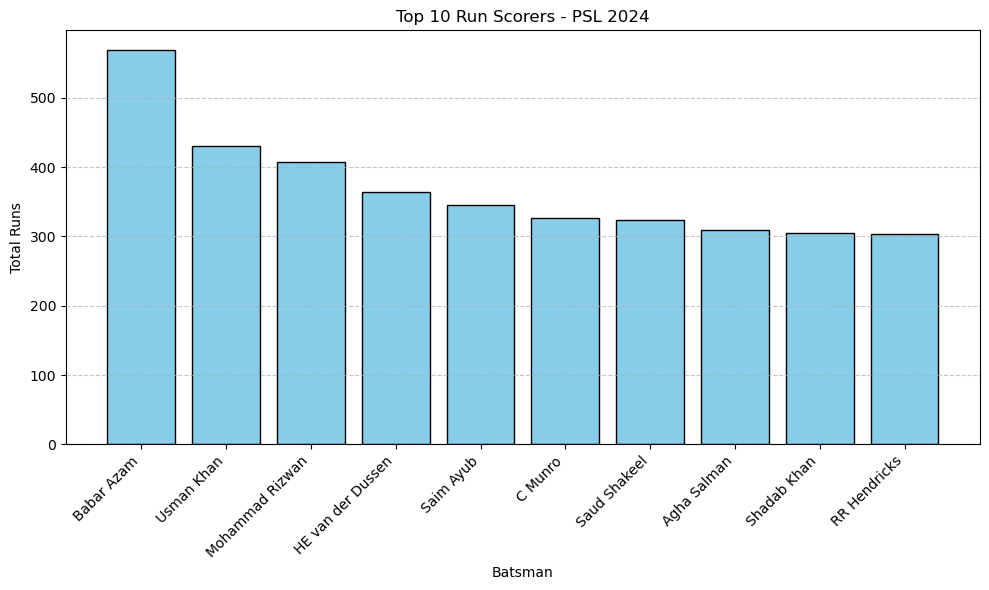

In [85]:
plt.figure(figsize=(10,6))
plt.bar(top_batsmen["striker"], top_batsmen["runs_off_bat"], color="skyblue", edgecolor="black")
plt.xlabel("Batsman")
plt.ylabel("Total Runs")
plt.title("Top 10 Run Scorers - PSL 2024")
plt.xticks(rotation=45, ha="right")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.savefig("top10_batsmen.png", dpi=300)


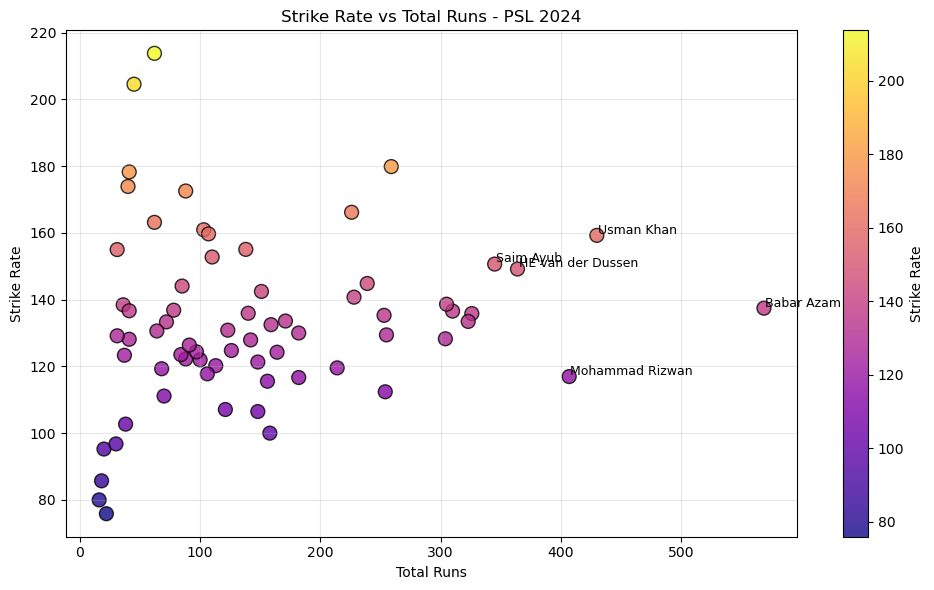

In [86]:
# Calculate total runs per batsman
batsman_stats = df.groupby("striker").agg(
    runs=("runs_off_bat", "sum"),
    balls_faced=("ball", "count")
).reset_index()

# Calculate strike rate (avoid division by zero)
batsman_stats["strike_rate"] = (batsman_stats["runs"] / batsman_stats["balls_faced"]) * 100

# Filter players with at least 20 balls faced (to remove outliers)
batsman_stats = batsman_stats[batsman_stats["balls_faced"] >= 20]

# Scatter plot
plt.figure(figsize=(10,6))
scatter = plt.scatter(
    batsman_stats["runs"],
    batsman_stats["strike_rate"],
    c=batsman_stats["strike_rate"],
    cmap="plasma",
    s=100,
    edgecolor="black",
    alpha=0.8
)

plt.colorbar(scatter, label="Strike Rate")
plt.xlabel("Total Runs")
plt.ylabel("Strike Rate")
plt.title("Strike Rate vs Total Runs - PSL 2024")

# Annotate top 5 run scorers
top5 = batsman_stats.sort_values(by="runs", ascending=False).head(5)
for _, row in top5.iterrows():
    plt.text(row["runs"]+1, row["strike_rate"]+0.5, row["striker"], fontsize=9)

plt.grid(alpha=0.3)
plt.tight_layout()
plt.savefig("strike_rate_vs_runs.png", dpi=300)
plt.show()

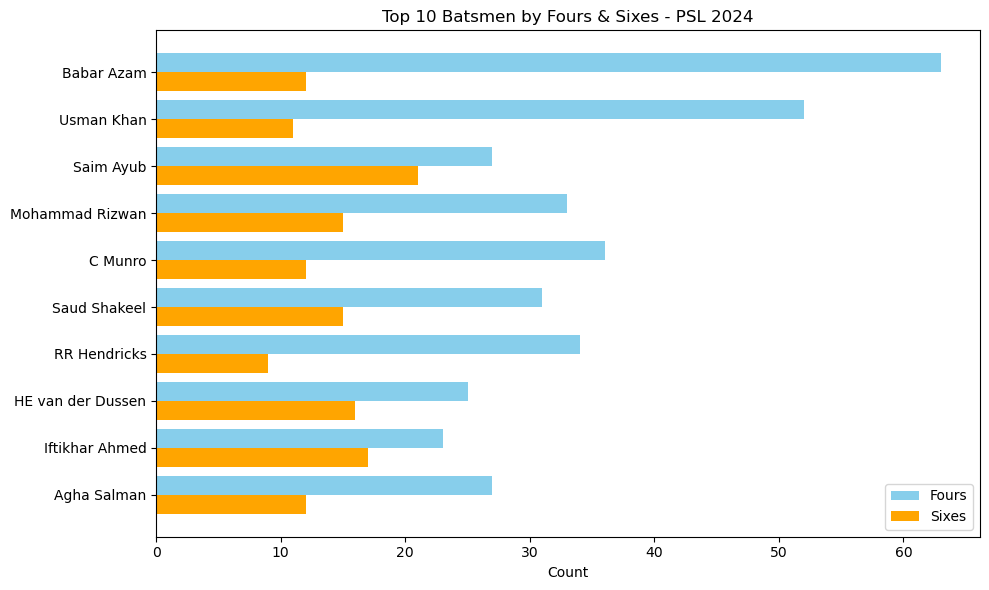

In [87]:
fours = df[df["runs_off_bat"] == 4].groupby("striker")["runs_off_bat"].count()
sixes = df[df["runs_off_bat"] == 6].groupby("striker")["runs_off_bat"].count()

# Combine into one DataFrame
boundary_stats = pd.DataFrame({
    "Fours": fours,
    "Sixes": sixes
}).fillna(0).astype(int)

# Get top 10 players by total boundaries (fours + sixes)
boundary_stats["Total Boundaries"] = boundary_stats["Fours"] + boundary_stats["Sixes"]
top_boundaries = boundary_stats.sort_values(by="Total Boundaries", ascending=False).head(10)

# Plot
fig, ax = plt.subplots(figsize=(10,6))

bar_width = 0.4
y_positions = np.arange(len(top_boundaries))

ax.barh(y_positions - bar_width/2, top_boundaries["Fours"], height=bar_width, label="Fours", color="skyblue")
ax.barh(y_positions + bar_width/2, top_boundaries["Sixes"], height=bar_width, label="Sixes", color="orange")

# Labels & Title
ax.set_yticks(y_positions)
ax.set_yticklabels(top_boundaries.index)
ax.invert_yaxis()  # Highest at the top
ax.set_xlabel("Count")
ax.set_title("Top 10 Batsmen by Fours & Sixes - PSL 2024")
ax.legend()

plt.tight_layout()
plt.savefig("top_fours_sixes.png", dpi=300)
plt.show()

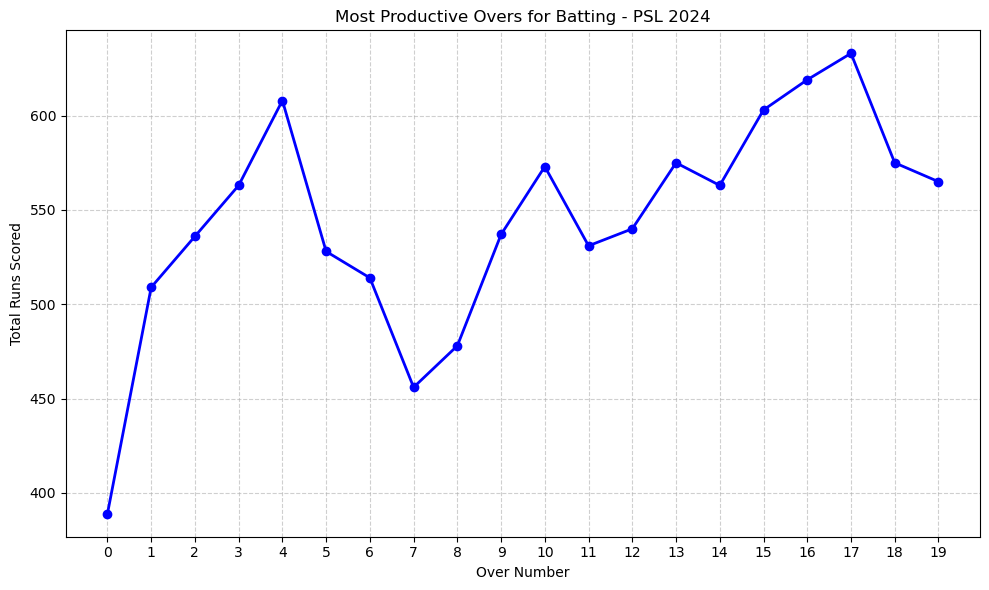

In [88]:
df["over"] = df["ball"].astype(str).str.split(".").str[0].astype(int)

# Calculate total runs per over (runs_off_bat + extras)
df["total_runs"] = df["runs_off_bat"] + df["extras"]

over_runs = df.groupby("over")["total_runs"].sum()

# Plot line chart
plt.figure(figsize=(10,6))
plt.plot(over_runs.index, over_runs.values, marker="o", color="blue", linewidth=2)

# Labels & Title
plt.xlabel("Over Number")
plt.ylabel("Total Runs Scored")
plt.title("Most Productive Overs for Batting - PSL 2024")
plt.grid(True, linestyle="--", alpha=0.6)
plt.xticks(range(over_runs.index.min(), over_runs.index.max() + 1))
plt.tight_layout()

plt.savefig("productive_overs.png", dpi=300)
plt.show()

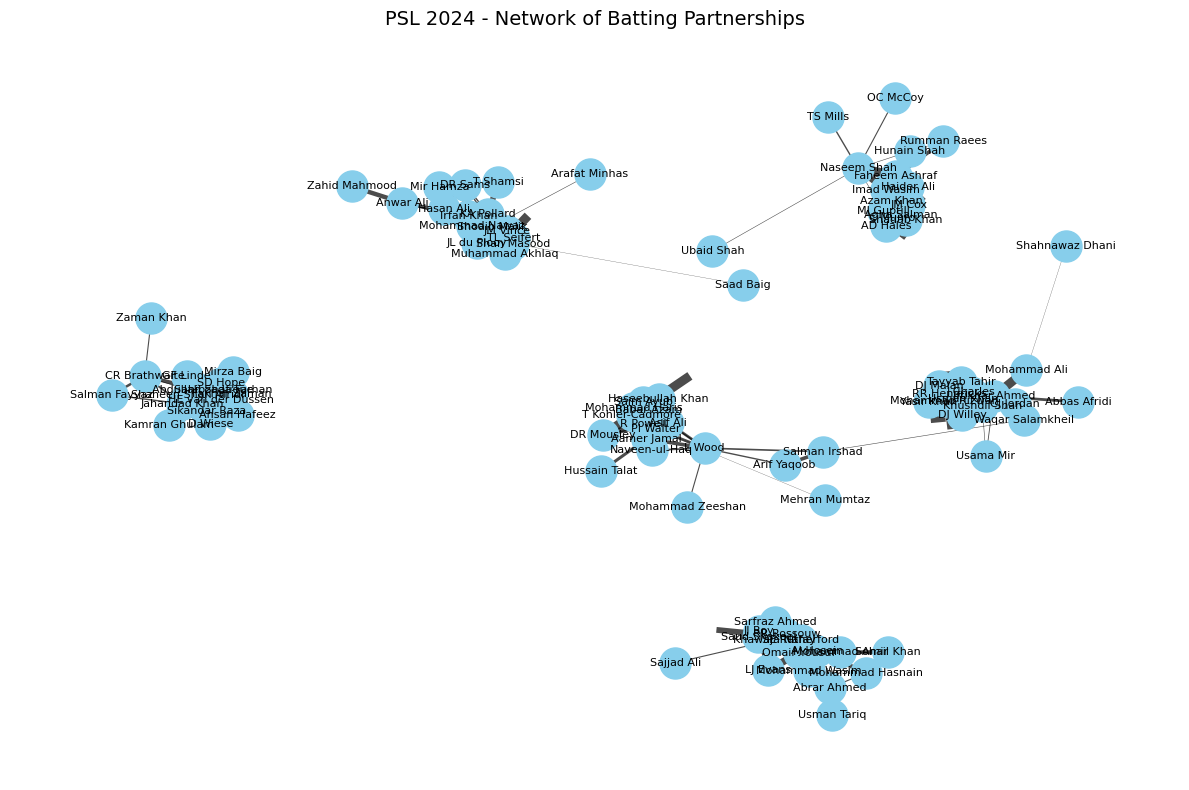

In [89]:
pairs = df[["striker", "non_striker"]].dropna()

# Build graph
G = nx.Graph()

for _, row in pairs.iterrows():
    striker = row["striker"]
    non_striker = row["non_striker"]
    
    # Add nodes and edges
    G.add_node(striker)
    G.add_node(non_striker)
    
    if G.has_edge(striker, non_striker):
        G[striker][non_striker]["weight"] += 1  # count how many times they batted together
    else:
        G.add_edge(striker, non_striker, weight=1)

# Position nodes
pos = nx.spring_layout(G, k=0.3, seed=42)

# Draw nodes
plt.figure(figsize=(12, 8))
nx.draw_networkx_nodes(G, pos, node_color="skyblue", node_size=500)

# Draw edges with thickness based on how often they batted together
weights = [G[u][v]["weight"] for u, v in G.edges()]
nx.draw_networkx_edges(G, pos, width=[w * 0.2 for w in weights], alpha=0.7)

# Draw labels
nx.draw_networkx_labels(G, pos, font_size=8)

plt.title("PSL 2024 - Network of Batting Partnerships", fontsize=14)
plt.axis("off")
plt.tight_layout()
plt.savefig("batting_partnership_network.png", dpi=300)
plt.show()

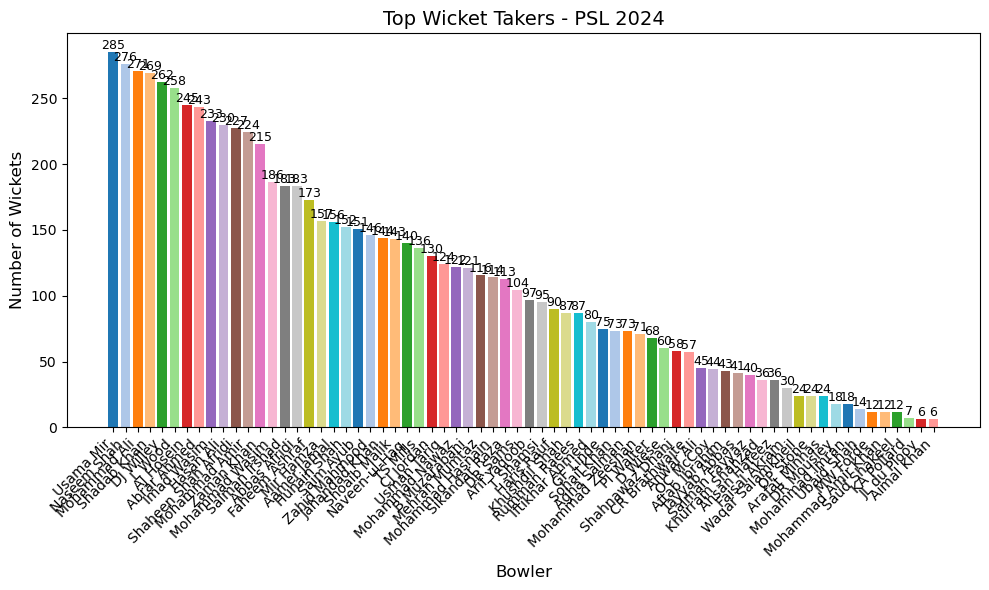

In [90]:
wicket_data = df[df["wicket_type"].notna()]

# Count wickets per bowler
wickets_per_bowler = wicket_data.groupby("bowler").size().sort_values(ascending=False)

# Plot bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(wickets_per_bowler.index, wickets_per_bowler.values, color=plt.cm.tab20.colors)

# Add labels
plt.title("Top Wicket Takers - PSL 2024", fontsize=14)
plt.xlabel("Bowler", fontsize=12)
plt.ylabel("Number of Wickets", fontsize=12)
plt.xticks(rotation=45, ha="right")

# Show values on top of bars
for bar in bars:
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
             int(bar.get_height()), ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

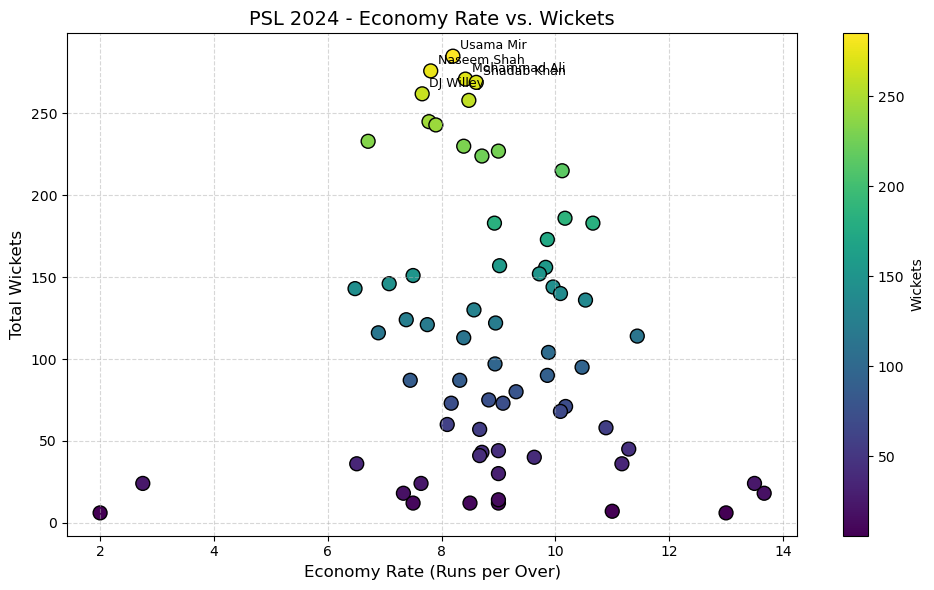

In [91]:
df["runs_conceded"] = df["runs_off_bat"] + df["extras"]

# Count legal deliveries (exclude wides and no-balls)
legal_deliveries = df[df["wides"] == 0].copy()
legal_deliveries = legal_deliveries[legal_deliveries["noballs"] == 0]

# Total balls per bowler
balls_per_bowler = legal_deliveries.groupby("bowler").size()

# Total runs conceded per bowler
runs_per_bowler = df.groupby("bowler")["runs_conceded"].sum()

# Economy rate = runs per over (balls / 6)
economy_rate = (runs_per_bowler / (balls_per_bowler / 6)).round(2)

# Total wickets per bowler
wickets_per_bowler = df[df["wicket_type"].notna()].groupby("bowler").size()

# Combine into a DataFrame
bowler_stats = pd.DataFrame({
    "Economy Rate": economy_rate,
    "Wickets": wickets_per_bowler
}).fillna(0)

# Scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    bowler_stats["Economy Rate"],
    bowler_stats["Wickets"],
    c=bowler_stats["Wickets"],  # Color based on wickets
    cmap="viridis",
    s=100,  # point size
    edgecolor="black"
)

# Labels & Title
plt.title("PSL 2024 - Economy Rate vs. Wickets", fontsize=14)
plt.xlabel("Economy Rate (Runs per Over)", fontsize=12)
plt.ylabel("Total Wickets", fontsize=12)

# Annotate top performers
for bowler in bowler_stats.sort_values(by="Wickets", ascending=False).head(5).index:
    plt.annotate(bowler, 
                 (bowler_stats.loc[bowler, "Economy Rate"], bowler_stats.loc[bowler, "Wickets"]),
                 textcoords="offset points", xytext=(5,5), fontsize=9)

plt.colorbar(scatter, label="Wickets")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

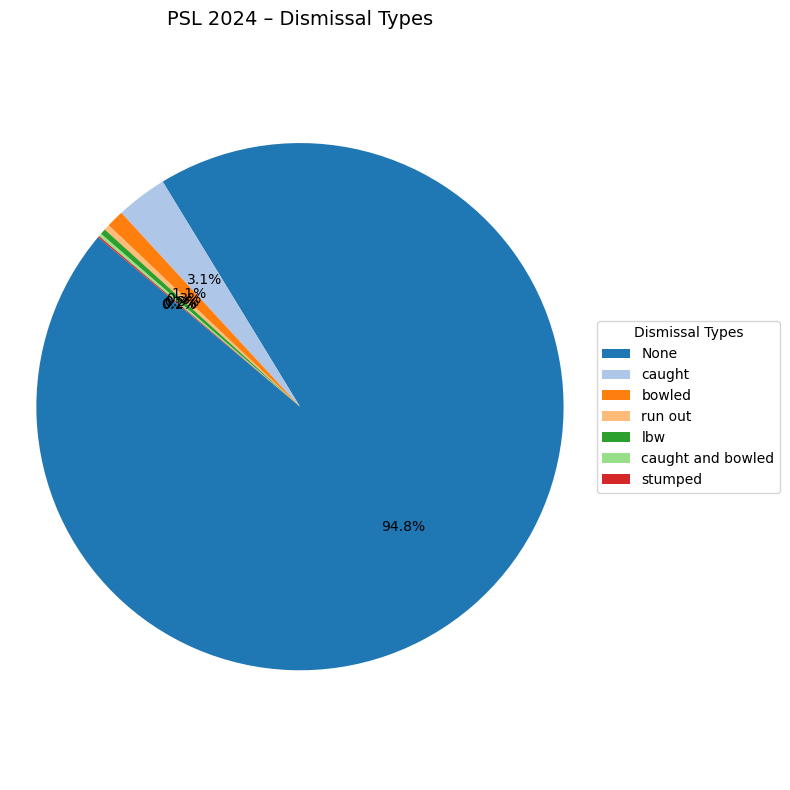

In [93]:
wicket_data = df[df["wicket_type"].notna()]

# Count each type of dismissal
dismissal_counts = wicket_data["wicket_type"].value_counts()

# Plot pie chart without overlapping labels
plt.figure(figsize=(8, 8))
colors = plt.cm.tab20.colors

# Pie chart without labels directly on the wedges
wedges, texts, autotexts = plt.pie(
    dismissal_counts,
    autopct="%1.1f%%",
    startangle=140,
    colors=colors,
    textprops={"fontsize": 10}
)

# Add a legend instead of labels on the pie
plt.legend(
    wedges,
    dismissal_counts.index,
    title="Dismissal Types",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1),
    fontsize=10
)

# Title
plt.title("PSL 2024 – Dismissal Types", fontsize=14)
plt.axis("equal")  # Equal aspect ratio
plt.tight_layout()
plt.show()